[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Todti-I/python-hw-1/blob/main/homework-1/Part2.ipynb)

# Подгружаем зависимости

In [ ]:
%pip install pandas
%pip install matplotlib

# Загружаем данные из прошлой части

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime

data_filename= 'data.csv'

if os.path.exists(data_filename):
  df_original = pd.read_csv(data_filename)
else:
  raise Exception('Data file not found')

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Columns: 109 entries, id to metro.colors
dtypes: bool(2), float64(34), int64(30), object(43)
memory usage: 8.7+ MB


# Нормализуем данные. Делаем топ 10 регионов 

In [3]:
region_names = df_original.drop_duplicates(subset='region').set_index('region')['developer.regRegionDesc'].to_dict()
top10_regions = df_original.groupby(['region']).size().reset_index(name='count').sort_values('count', ascending=False).head(10)['region'].values

df_analysis = df_original.loc[df_original['region'].isin(top10_regions)].copy()
df_analysis['readyYear'] = df_analysis['objReady100PercDt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().year)
df_analysis = df_analysis[['id', 'region', 'objPriceAvg', 'objSquareLiving', 'readyYear',  'objFloorCnt']].convert_dtypes()
df_analysis

,id,region,objPriceAvg,objSquareLiving,readyYear,objFloorCnt
0,12307,78,147302,42347.0,2022,16
1,7694,78,<NA>,0.0,2025,5
2,45757,78,200000,30736.0,2024,10
3,12060,78,<NA>,0.0,2023,7
4,12064,78,178054,20943.6,2023,25
...,...,...,...,...,...,...
10643,42864,72,99305,26317.05,2023,22
10645,47742,72,<NA>,10784.54,2024,25
10656,7910,77,485441,0.0,2022,21
10658,43078,50,75246,5767.55,2023,14


Проведу аналитику в сводке топ 10 городов по объемам вводимого жилья

# Рассчитываем количество вводимого жилья по регионам и по годам

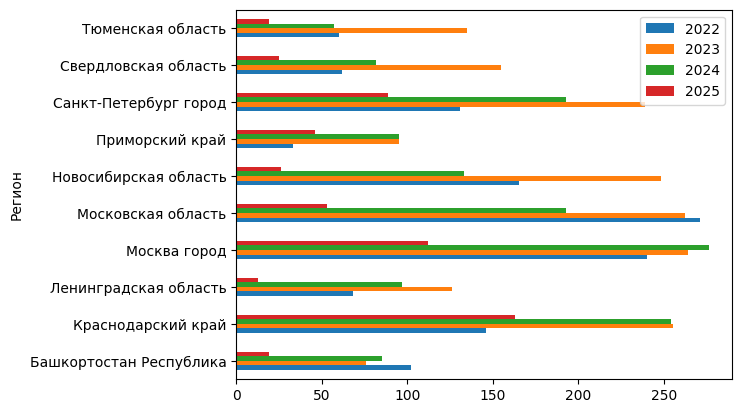

In [4]:
df_years = df_analysis.query('readyYear >= 2022 and readyYear < 2026', engine='python')
df_years = df_years.groupby(['region', 'readyYear']).size().reset_index(name='count')
df_years['region'] = df_years['region'].transform(lambda x: region_names[x])
df_years = df_years.set_index(['readyYear', 'region'])

plt_years = df_years.unstack(level='readyYear').plot(kind='barh')
plt_years.set_ylabel('Регион')
plt_years.legend(range(2022, 2026))
plt.show()

Исходя из графика можно увидеть, что большая часть домов будет введена в 2022 - 2024 годах

# Рассчитываем средние цены за квадратный метр по регионам

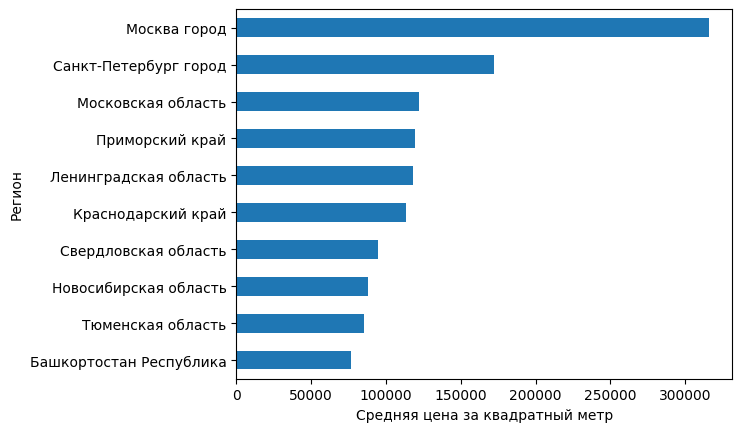

In [5]:
df_prices = df_analysis.groupby(['region'])['objPriceAvg'].mean().transform(round).reset_index(name='avgPrice')
df_prices['region'] = df_prices['region'].transform(lambda x: region_names[x])
df_prices = df_prices.set_index('region').sort_values('avgPrice')

plt_prices = df_prices.plot(kind='barh', legend=False)
plt_prices.set_xlabel('Средняя цена за квадратный метр')
plt_prices.set_ylabel('Регион')
plt.show()

Исходя из графика можно увидеть, насколько дороже жилой квадратный метр в столице по сравнению с другими регионами

# Рассчитываем среднюю этажность домов  

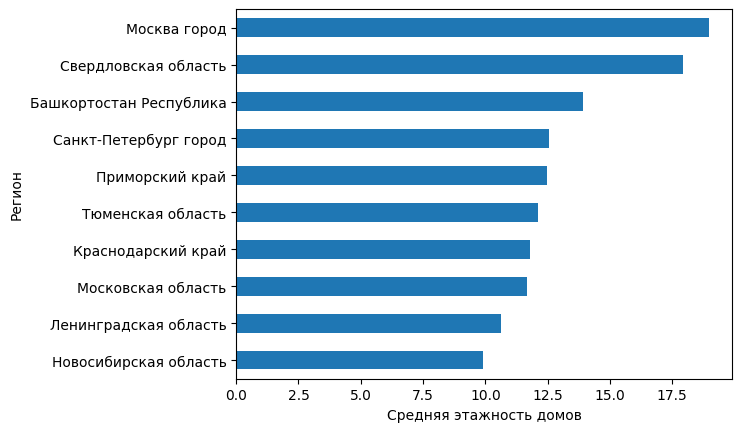

In [6]:
df_floors = df_analysis.groupby(['region'])['objFloorCnt'].mean().reset_index(name='avgFloors')
df_floors['region'] = df_floors['region'].transform(lambda x: region_names[x])
df_floors = df_floors.set_index('region').sort_values('avgFloors')

plt_floors = df_floors.plot(kind='barh', legend=False)
plt_floors.set_xlabel('Средняя этажность домов')
plt_floors.set_ylabel('Регион')
plt.show()

Исходя из графика можно увидеть, что самые высокие здания будет сданы в Москве и Свердловской области

# Рассчитываем количество домов по регионам

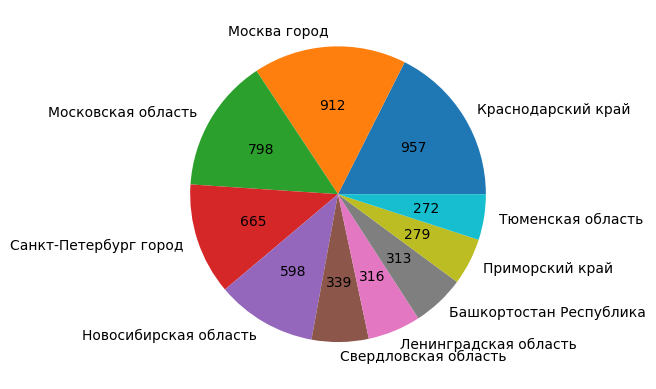

In [7]:
df_count = df_analysis.groupby(['region']).size().reset_index(name='count')
df_count['region'] = df_count['region'].transform(lambda x: region_names[x])
df_count = df_count.set_index('region').sort_values('count', ascending=False)

total_count = df_count['count'].sum()
plt_count = df_count.plot(kind='pie', y='count', legend=False, autopct=lambda x : '{:,.0f}'.format(x * total_count / 100))
plt_count.set_ylabel('')
plt.show()

Исходя из графика можно заменить, что большая часть строившихся домов находится в Краснодарском край и в Московской области 

# Рассчитываем среднюю жилую площадь домов

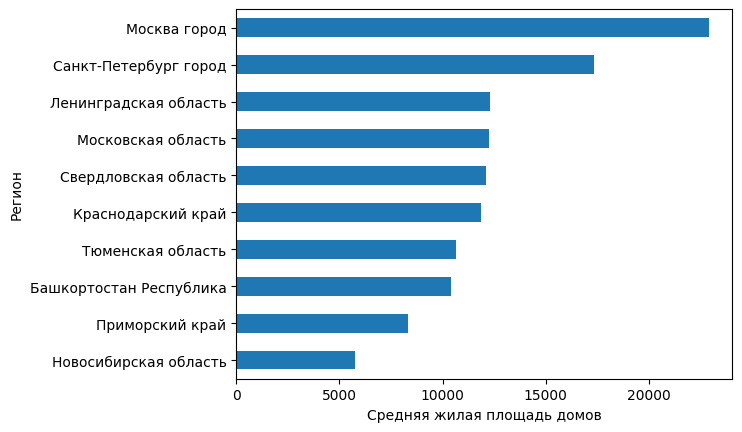

In [8]:
df_square = df_analysis.loc[df_analysis['objSquareLiving'] != 0]
df_square = df_square.groupby(['region'])['objSquareLiving'].mean().reset_index(name='avgSquare')
df_square['region'] = df_square['region'].transform(lambda x: region_names[x])
df_square = df_square.set_index('region').sort_values('avgSquare')

plt_square = df_square.plot(kind='barh', legend=False)
plt_square.set_xlabel('Средняя жилая площадь домов')
plt_square.set_ylabel('Регион')
plt.show()

Исходя из графика можно заметить, что Москва и Санкт-Петербург предлагают наибольшую жилую площадь